In [3]:
import pandas as pd
import numpy as np
import nltk
from nltk .sentiment.vader import SentimentIntensityAnalyzer
import re
from textblob import TextBlob
import seaborn as sns
import cufflinks as cf
import matplotlib.pyplot as plt
import spacy
import re
import string
import inflect
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import SnowballStemmer,WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import spacy
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

In [4]:
df=pd.read_csv("data.csv")
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [6]:
df.isnull()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...
8513,True,True,True,True,True,True,True,False
8514,True,True,True,True,True,True,True,False
8515,True,True,True,True,True,True,True,False
8516,True,True,True,True,True,True,True,False


In [7]:
df.duplicated().sum()

4

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8514 entries, 0 to 8515
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8514 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 598.6+ KB


In [11]:
df.isnull().sum()

Reviewer Name        6
Review Title         6
Place of Review     46
Up Votes             6
Down Votes           6
Month              461
Review text          4
Ratings              0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

Reviewer Name      0
Review Title       0
Place of Review    0
Up Votes           0
Down Votes         0
Month              0
Review text        0
Ratings            0
dtype: int64

In [14]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.READ MORE,5
6,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more...,5
...,...,...,...,...,...,...,...,...
8495,vishal kumar ashish,Nice,"Certified Buyer, Haridwar",0.0,0.0,Oct 2016,Thanks to the delivery boy ... Service is alwa...,5
8496,Nitya Nand Rai,Good choice,"Certified Buyer, Raebareli",0.0,0.0,Oct 2016,Over priced even after 50% discount price is m...,1
8497,Tarun Reddy,Awesome,Certified Buyer,0.0,0.0,Oct 2016,Too much priced. It was getting me for Rs. 640...,1
8499,Jayachandra,High cost,"Certified Buyer, Mangalore",0.0,0.0,Dec 2015,Hii flipkart customers care..why your delivery...,5


In [15]:
def sentiment(x):
    if x<=2:
        return "Negative"
    elif x==5:
        return "neutral"
    else:
        return "Postive"
df["sentiment"]=df["Ratings"].apply(sentiment)
        

In [16]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,sentiment
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,Postive
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,Negative
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,Negative
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.READ MORE,5,neutral
6,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more...,5,neutral
...,...,...,...,...,...,...,...,...,...
8495,vishal kumar ashish,Nice,"Certified Buyer, Haridwar",0.0,0.0,Oct 2016,Thanks to the delivery boy ... Service is alwa...,5,neutral
8496,Nitya Nand Rai,Good choice,"Certified Buyer, Raebareli",0.0,0.0,Oct 2016,Over priced even after 50% discount price is m...,1,Negative
8497,Tarun Reddy,Awesome,Certified Buyer,0.0,0.0,Oct 2016,Too much priced. It was getting me for Rs. 640...,1,Negative
8499,Jayachandra,High cost,"Certified Buyer, Mangalore",0.0,0.0,Dec 2015,Hii flipkart customers care..why your delivery...,5,neutral


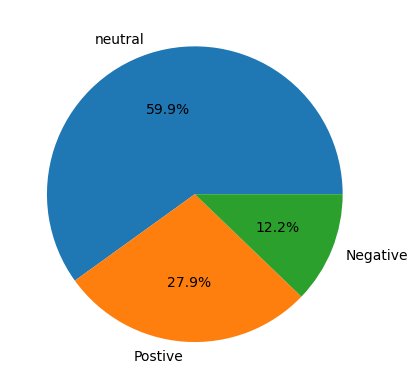

In [17]:

x = df['sentiment'].value_counts() 
plt.pie(x.values, 
        labels=x.index, 
        autopct='%1.1f%%') 
plt.show() 

In [18]:
df['sentiment_num']=df['sentiment'].map({'neutral':1,'Postive':1,'Negative':0})
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,sentiment,sentiment_num
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,Postive,1
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,Negative,0
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,Negative,0
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.READ MORE,5,neutral,1
6,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more...,5,neutral,1
...,...,...,...,...,...,...,...,...,...,...
8495,vishal kumar ashish,Nice,"Certified Buyer, Haridwar",0.0,0.0,Oct 2016,Thanks to the delivery boy ... Service is alwa...,5,neutral,1
8496,Nitya Nand Rai,Good choice,"Certified Buyer, Raebareli",0.0,0.0,Oct 2016,Over priced even after 50% discount price is m...,1,Negative,0
8497,Tarun Reddy,Awesome,Certified Buyer,0.0,0.0,Oct 2016,Too much priced. It was getting me for Rs. 640...,1,Negative,0
8499,Jayachandra,High cost,"Certified Buyer, Mangalore",0.0,0.0,Dec 2015,Hii flipkart customers care..why your delivery...,5,neutral,1


In [19]:
def text_preprocessing(corpus,flag):
    
    # change  of numbers
    p=inflect.engine()
    corpus=re.sub(r'\d+',lambda x: p.number_to_words(x.group(0)),corpus)
    
    # remove special characters
    corpus=re.sub('[^a-zA-Z]',' ',corpus)
    
    corpus=corpus.lower()
    
    # removal of whitespaces
    corpus=' '.join(corpus.split())

    #tokenize
    words=word_tokenize(corpus)
    if flag=="stemming":
    #stemming
        stemmer=SnowballStemmer(language='english')
        return ' '.join(stemmer.stem(word) for word in words if word not in set(nltk.corpus.stopwords.words('english')))
    else:
    #lemmatization
        lemmatizer=WordNetLemmatizer()
        return ' '.join(lemmatizer.lemmatize(word) for word in words if word not in set(nltk.corpus.stopwords.words('english')))


#flag is either "stemming" or "lemmatization"

In [20]:
df['Review']=df['Review text'].apply(lambda x: text_preprocessing(x,flag="stemming"))

In [21]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,sentiment,sentiment_num,Review
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,Postive,1,nice product good qualiti price rise bad sign ...
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,Negative,0,suppli yonex mavi three hundr fifti outsid cov...
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,Negative,0,worst product damag shuttlecock pack new box o...
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.READ MORE,5,neutral,1,good qualiti product deliv time read
6,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more...,5,neutral,1,best purchas good qualiti durabl averag shuttl...
...,...,...,...,...,...,...,...,...,...,...,...
8495,vishal kumar ashish,Nice,"Certified Buyer, Haridwar",0.0,0.0,Oct 2016,Thanks to the delivery boy ... Service is alwa...,5,neutral,1,thank deliveri boy servic alway awesom read
8496,Nitya Nand Rai,Good choice,"Certified Buyer, Raebareli",0.0,0.0,Oct 2016,Over priced even after 50% discount price is m...,1,Negative,0,price even fifti discount price much higher us...
8497,Tarun Reddy,Awesome,Certified Buyer,0.0,0.0,Oct 2016,Too much priced. It was getting me for Rs. 640...,1,Negative,0,much price get rs six hundr forti home town ad...
8499,Jayachandra,High cost,"Certified Buyer, Mangalore",0.0,0.0,Dec 2015,Hii flipkart customers care..why your delivery...,5,neutral,1,hii flipkart custom care deliveri boy bring sw...


In [22]:
new_df=df.copy()

In [23]:
new_df.drop(columns=["Reviewer Name","Review Title","Place of Review","Up Votes","Down Votes","Month","Review text","Ratings","sentiment"],inplace=True)

In [24]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8013 entries, 0 to 8507
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sentiment_num  8013 non-null   int64 
 1   Review         8013 non-null   object
dtypes: int64(1), object(1)
memory usage: 187.8+ KB


In [25]:
new_df

,sentiment_num,Review
0,1,nice product good qualiti price rise bad sign ...
1,0,suppli yonex mavi three hundr fifti outsid cov...
2,0,worst product damag shuttlecock pack new box o...
5,1,good qualiti product deliv time read
6,1,best purchas good qualiti durabl averag shuttl...
...,...,...
8495,1,thank deliveri boy servic alway awesom read
8496,0,price even fifti discount price much higher us...
8497,0,much price get rs six hundr forti home town ad...
8499,1,hii flipkart custom care deliveri boy bring sw...


In [26]:
nlp=spacy.load('en_core_web_lg')
new_df['Vector']=new_df['Review'].apply(lambda x: nlp(x).vector)
new_df

,sentiment_num,Review,Vector
0,1,nice product good qualiti price rise bad sign ...,"[-0.20701271, 0.61516136, -1.9068216, -0.45178..."
1,0,suppli yonex mavi three hundr fifti outsid cov...,"[0.5842073, 0.6263514, -0.48709133, -0.3321505..."
2,0,worst product damag shuttlecock pack new box o...,"[-1.0199543, -0.06475353, -1.0445365, -0.35563..."
5,1,good qualiti product deliv time read,"[0.052336693, -0.48143336, -0.23094504, -0.467..."
6,1,best purchas good qualiti durabl averag shuttl...,"[0.0014555587, -0.18312888, -0.58405554, -0.53..."
...,...,...,...
8495,1,thank deliveri boy servic alway awesom read,"[0.31111002, -0.02565997, -0.9571642, -2.17283..."
8496,0,price even fifti discount price much higher us...,"[-0.08254353, 0.36397007, -1.7356278, 0.426363..."
8497,0,much price get rs six hundr forti home town ad...,"[-0.34948352, 1.2083315, -1.7409216, -0.550959..."
8499,1,hii flipkart custom care deliveri boy bring sw...,"[0.1665534, 1.4846532, -1.3536141, 0.34168446,..."


In [33]:
X_train,X_test,y_train,y_test=train_test_split(new_df['Vector'],new_df['sentiment_num'],test_size=0.2)
print(X_train.shape,X_test.shape)

(6410,) (1603,)


In [34]:
X_train_stack = np.stack(X_train)
X_test_stack = np.stack(X_test)
print(X_train_stack.shape,X_test_stack.shape)

(6410, 300) (1603, 300)


In [35]:
scaler = MinMaxScaler()
X_train_stack_sc = scaler.fit_transform(X_train_stack)
X_test_stack_sc = scaler.transform(X_test_stack)


In [38]:
model = MultinomialNB()
model.fit(X_train_stack_sc, y_train)

MultinomialNB()

In [39]:
y_pred = model.predict(X_test_stack_sc)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [40]:
y_test

6909    1
2209    1
1655    1
3196    1
8163    1
       ..
3302    0
4158    1
4823    0
7894    1
8377    1
Name: sentiment_num, Length: 1603, dtype: int64

In [41]:
print('Accuracy Score:',accuracy_score(y_test, y_pred))

Accuracy Score: 0.8727386150966937


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       204
           1       0.87      1.00      0.93      1399

    accuracy                           0.87      1603
   macro avg       0.44      0.50      0.47      1603
weighted avg       0.76      0.87      0.81      1603



C:\Users\saisr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\saisr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\saisr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [43]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.9320453031312459

In [47]:
import pickle

In [46]:
import pickle

In [48]:
pickle.dump(scaler,open("navie_bay","wb"))

In [50]:
loaded_model=pickle.load(open("navie_bay",'rb'))

In [53]:
print(X_train)

3388    [0.16588667, -0.010099994, -0.51085556, 0.3155...
5844    [1.35437, -0.36093998, 1.468855, -3.1659198, 0...
6449    [-0.27315, 0.58015, -2.0174, 0.19172, -0.01483...
3514    [-0.76947, -0.41814998, -2.0707, 0.15765, 1.83...
3861    [-0.539014, 0.24323702, -1.677219, -0.87396395...
                              ...                        
2466    [-0.13919, -0.7603, -1.6112, -0.07675, 1.07335...
6657    [-0.09279334, -0.50686663, -1.0741333, -0.0511...
5546    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1986    [-0.13919, -0.7603, -1.6112, -0.07675, 1.07335...
60      [0.11238004, 0.78845865, 0.3225744, -0.4352799...
Name: Vector, Length: 6410, dtype: object


In [54]:
txt=input()
txt


this is bad


'this is bad'

In [63]:
cleaned_txt=text_preprocessing(txt,flag="stemming")
cleaned_txt

'bad'

In [67]:
lemmatized_txt=text_preprocessing(cleaned_txt,flag="lemmatization")
lemmatized_txt

'bad'

In [73]:
vec_model=pickle.load(open("scaler",'rb'))
vec_txt=vec_model.transform([lemmatized_txt])
vec_txt

FileNotFoundError: [Errno 2] No such file or directory: 'scaler'

In [72]:
sent=pickle.load(open("navie_bay",'rb'))
l_pred=sent.predict(vec_txt)
l_pred

AttributeError: 'MinMaxScaler' object has no attribute 'predict'

In [76]:
sentiment=model.predict(vec_txt)
print(sentiment)

ValueError: X has 3565 features, but MultinomialNB is expecting 300 features as input.